In [1]:
import os
import shutil
import numpy as np
import pandas as pd
import flopy
import lumpyrem as lr
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

c:\users\nat12nho\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
bins_pth = os.path.join('..', 'bins', 'win') if 'nt' in os.name else os.path.join('..', 'bins', 'linux') # Binaries

In [4]:
lr_ws = os.path.join('..', 'lr_prep') # Lumprem model workspace

In [5]:
lumprem_input_pth = os.path.join('..', 'data', 'lumprem_input') # Input data curated in a previous notebook
os.listdir(lumprem_input_pth)

['evapot.dat', 'rainfall.dat']

In [6]:
if not os.path.exists(lr_ws):
    os.mkdir(lr_ws)

In [7]:
for file in os.listdir(lumprem_input_pth):
    shutil.copyfile(lumprem_input_pth+'\\'+file, lr_ws+'\\'+file) #Works for Windows. Does it work for Linux?

In [8]:
os.listdir(lr_ws)

['evapot.dat',
 'lr_lu1.csv',
 'lr_lu1.in',
 'lr_lu1.out',
 'lr_lu1.tpl',
 'lumprem_variables.rec',
 'rainfall.dat',
 'rch.ts.in']

In [9]:
# initiate the model and write the in files. What about rbuf & mbuf?
# landuse model for recharge, evap
lr_lu1 = lr.lumprem.Model(
    model_name = 'lu1',
    workspace = lr_ws,
    irrigvolfrac = 0.0,
    rainfile = 'rainfall.dat',
    epotfile = 'evapot.dat',
    maxvol = 0.2, # Varför valde jag 0.2 istället för 0.5 som är default?
    vol = 0.1,
    ks = 43.2 # 43.2 m/day = 0.0005 m/s ≈ reasonable initial guess considering local geology
)

In [10]:
lr_lu1.write_model(
    start_date = '01/01/2016',
    end_date = '01/01/2020',
    noutdays='monthly',
    mxiter = 500,
)
lr_lu1.run_model(version=2)

LUMPREM model input file written to: 
..\lr_prep\lr_lu1.in
PEST template file written to: 
..\lr_prep\lr_lu1.tpl

 Enter name of LUMPREM input file:  Enter name for LUMPREM tabular output file:  Enter name for CSV output file (<Enter> if none):  
 - file lr_lu1.in read ok.
 - file lumprem_variables.rec written ok.
 - file rainfall.dat read ok.
 - file evapot.dat read ok.
 RECHMOD upper bucket: call   1 day   1 step   1: iteration limit exceeded
 RECHMOD upper bucket: call   1 day   2 step   1: iteration limit exceeded
 RECHMOD upper bucket: call   1 day   3 step   1: iteration limit exceeded
 RECHMOD upper bucket: call   1 day   4 step   1: iteration limit exceeded
 RECHMOD upper bucket: call   1 day   5 step   1: iteration limit exceeded
 RECHMOD upper bucket: call   1 day   6 step   1: iteration limit exceeded
 RECHMOD upper bucket: call   7 day  14 step   1: iteration limit exceeded
 RECHMOD upper bucket: call   7 day  15 step   1: iteration limit exceeded
 RECHMOD upper bucket: cal

In [11]:
# get model results
results = lr_lu1.get_results()
display(results.head())

,days,vol_upper,vol_lower,vol_drain,vol_macro,del_vol_upper,del_vol_lower,del_vol_drain,del_vol_macro,rainfall,...,workspace,maxvol_br,extravol_br,gamma_br,ks_br,m_br,l_br,vol_br,epotfile_br,epot_br_all
0,0,0.100000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0000,...,..\lr_prep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,31,0.029620,0.0,0.012521,0.0,-0.070380,0.0,0.012521,0.0,0.0367,...,..\lr_prep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,60,0.020521,0.0,0.002498,0.0,-0.009098,0.0,-0.010023,0.0,0.0285,...,..\lr_prep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,91,0.029373,0.0,0.005160,0.0,0.008852,0.0,0.002663,0.0,0.0354,...,..\lr_prep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,121,0.032995,0.0,0.012032,0.0,0.003622,0.0,0.006871,0.0,0.0651,...,..\lr_prep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
display(results.tail())

,days,vol_upper,vol_lower,vol_drain,vol_macro,del_vol_upper,del_vol_lower,del_vol_drain,del_vol_macro,rainfall,...,workspace,maxvol_br,extravol_br,gamma_br,ks_br,m_br,l_br,vol_br,epotfile_br,epot_br_all
44,1339,0.028656,0.0,0.011535,0.0,-0.001046,0.0,0.002256,0.0,0.1049,...,..\lr_prep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,1369,0.033879,0.0,0.010354,0.0,0.005223,0.0,-0.001181,0.0,0.1053,...,..\lr_prep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,1400,0.022116,0.0,0.003948,0.0,-0.011763,0.0,-0.006406,0.0,0.0686,...,..\lr_prep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,1430,0.030076,0.0,0.023750,0.0,0.007959,0.0,0.019802,0.0,0.0734,...,..\lr_prep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,1461,0.024696,0.0,0.005877,0.0,-0.005379,0.0,-0.017873,0.0,0.0654,...,..\lr_prep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


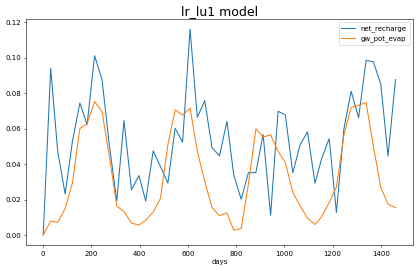

In [13]:
fig = plt.figure(figsize=(10, 6), dpi=50)
ax = fig.add_subplot(1, 1, 1)
plt.ticklabel_format(axis='both', style='plain', useOffset=False) #Show coordinates
ax.set_title('lr_lu1 model', fontsize=18)

results.plot('days','net_recharge', ax=ax)
results.plot('days', 'gw_pot_evap', ax=ax)

plt.legend()
plt.show()

GHB Models:

In [ ]:
lr_gred = lr.lumprem.Model(
    model_name = 'lr_gred',
    workspace = lr_ws,
    factor1 = 30,
    factor2 = 20,
    power = 2,
    offset = 150.0,
    maxvol = 1,
    surface = 200,
    ks = 43.2,
    irrigvolfrac=0.0,
    rainfile = 'rainfall.dat',
    epotfile = 'evapot.dat',
)

In [ ]:
lr_gred.write_model(
    start_date = '01/01/2016',
    end_date = '01/01/2020',
    noutdays='monthly',
    mxiter = 500,
)

lr_gred.run_model(version=2)

In [ ]:
lr_gred_df = lr_gred.get_results()

In [ ]:
# plot the model results
import seaborn as sb
sb.lineplot(data=lr_gred_df, x='days',y='elevation', hue='lumprem_model_name', alpha=0.5);

# load the simulation

In [14]:
org_model_ws = os.path.join('..', 'experimental')
os.listdir(org_model_ws)

['experimental.cbb',
 'experimental.disv',
 'experimental.disv.grb',
 'experimental.ghb',
 'experimental.hds',
 'experimental.ic',
 'experimental.ims',
 'experimental.lst',
 'experimental.nam',
 'experimental.npf',
 'experimental.obs',
 'experimental.oc',
 'experimental.rch',
 'experimental.sfr',
 'experimental.sfr.bud',
 'experimental.sfr.obs',
 'experimental.sto',
 'experimental.tdis',
 'experimental_leakage.sfr.obs',
 'head.obs.csv',
 'mfsim.lst',
 'mfsim.nam',
 'sfr.obs.csv',
 'sfr_leakage.obs.csv']

In [15]:
tmp_model_ws = os.path.join('..', 'temp_flopy_lr')
if os.path.exists(tmp_model_ws):
    shutil.rmtree(tmp_model_ws)
shutil.copytree(org_model_ws,tmp_model_ws)
os.listdir(tmp_model_ws)

['experimental.cbb',
 'experimental.disv',
 'experimental.disv.grb',
 'experimental.ghb',
 'experimental.hds',
 'experimental.ic',
 'experimental.ims',
 'experimental.lst',
 'experimental.nam',
 'experimental.npf',
 'experimental.obs',
 'experimental.oc',
 'experimental.rch',
 'experimental.sfr',
 'experimental.sfr.bud',
 'experimental.sfr.obs',
 'experimental.sto',
 'experimental.tdis',
 'experimental_leakage.sfr.obs',
 'head.obs.csv',
 'mfsim.lst',
 'mfsim.nam',
 'sfr.obs.csv',
 'sfr_leakage.obs.csv']

In [16]:
ml_name = 'experimental'

In [17]:
loaded_sim = flopy.mf6.MFSimulation.load(ml_name, 'mf6', os.path.join(bins_pth, 'mf6'), tmp_model_ws)

loading simulation...
  loading simulation name file...
  loading tdis package...
  loading model gwf6...
    loading package disv...
    loading package obs...
    loading package sfr...
    loading package rch...
    loading package ghb...
    loading package sto...
    loading package oc...
    loading package npf...
    loading package ic...
  loading ims package experimental...


In [18]:
loaded_sim.run_simulation()

FloPy is using the following executable to run the model: ..\bins\win\mf6.exe
                                   MODFLOW 6
                U.S. GEOLOGICAL SURVEY MODULAR HYDROLOGIC MODEL
                            VERSION 6.2.1 02/18/2021

   MODFLOW 6 compiled Feb 18 2021 21:14:51 with IFORT compiler (ver. 19.10.3)

This software has been approved for release by the U.S. Geological 
Survey (USGS). Although the software has been subjected to rigorous 
review, the USGS reserves the right to update the software as needed 
pursuant to further analysis and review. No warranty, expressed or 
implied, is made by the USGS or the U.S. Government as to the 
functionality of the software and related material nor shall the 
fact of release constitute any such warranty. Furthermore, the 
software is released on condition that neither the USGS nor the U.S. 
Government shall be held liable for any damages resulting from its 
authorized or unauthorized use. Also refer to the USGS Water 
Resources So

(True, [])

In [19]:
mdl = loaded_sim.get_model('experimental')

In [20]:
ic = mdl.get_package('ic')

In [21]:
headfile = '{}.hds'.format(ml_name)
fname = os.path.join(tmp_model_ws, headfile)
hds = flopy.utils.binaryfile.HeadFile(fname)
h = hds.get_data()

In [22]:
ic.strt = hds.get_data()

In [23]:
disv = mdl.get_package('disv')

In [24]:
tdis = mdl.get_package('tdis')

In [25]:
rch = mdl.get_package('rch')
ghb = mdl.get_package('ghb')

In [26]:
mdl.remove_package('rch')

In [27]:
rch_ts = lr.lr2series.TimeSeries(
    ts_file='rch.ts',
    workspace=lr_ws,
    lr_models=[lr_lu1],
    ts_names=['rch'],
    lumprem_output_cols=['net_recharge'],
    methods=['linearend'],
    div_delta_t=True
)


In [28]:
rch_ts.write_ts()

MF6 timeseries file ..\lr_prep\rch.ts.in written to:
..\lr_prep\rch.ts.in
 Enter name of LR2SERIES control file:  
 - reading file rch.ts.in...
 
 - reading LUMPREM output file lr_lu1.out...
 - file lr_lu1.out read ok.
 - writing file rch.ts...
 - file rch.ts written ok.
 
 - file rch.ts.in read ok.



In [29]:
ghb_cell_ids = [i[0][1] for i in ghb.stress_period_data.data[0]]
#ghb_cell_ids cells in ghb cant be part of rch (will cause fortran error)

In [30]:
rchcells = np.array(list(range(disv.ncpl.data)), dtype=int)
rchcells[ghb_cell_ids] = -1
rch_spd = [
    ((0, rchcells[i]), 'rch_lu1', 1, 'rch') for i in range(disv.ncpl.data) if rchcells[i] > 0
]
rch_spd = {0: rch_spd, 1: rch_spd}

In [31]:
rch = flopy.mf6.ModflowGwfrch(
    mdl,
    filename='{}.rch'.format('experimental'), 
    pname='rch',
    fixed_cell=True,
    auxiliary='MULTIPLIER',
    auxmultname='MULTIPLIER',
    print_input=True,
    print_flows=True, 
    save_flows=True,
    boundnames=True,
    stress_period_data=rch_spd
)

In [32]:
# flopy requires that ou initilize a ts object to tell it which .ts file to read
#initialize the ts 
rch.ts.initialize(filename='rch.ts')


loaded_sim.write_simulation()

writing simulation...
  writing simulation name file...
  writing simulation tdis package...
  writing ims package experimental...
  writing model experimental...
    writing model name file...
    writing package disv...
    writing package gwf_obs...
    writing package sfr_obs...
    writing package sfr...
    writing package ghb...
    writing package sto...
    writing package oc...
    writing package npf...
    writing package ic...
    writing package rch...
INFORMATION: maxbound in ('gwf6', 'rch', 'dimensions') changed to 3603 based on size of stress_period_data
    writing package ts_0...


In [33]:
lumprem_ts = os.path.join(lr_ws, 'rch.ts')
flopy_ts = os.path.join(tmp_model_ws, 'rch.ts')

shutil.move(lumprem_ts, flopy_ts)

'..\\temp_flopy_lr\\rch.ts'

In [34]:
loaded_sim.run_simulation()

FloPy is using the following executable to run the model: ..\bins\win\mf6.exe
                                   MODFLOW 6
                U.S. GEOLOGICAL SURVEY MODULAR HYDROLOGIC MODEL
                            VERSION 6.2.1 02/18/2021

   MODFLOW 6 compiled Feb 18 2021 21:14:51 with IFORT compiler (ver. 19.10.3)

This software has been approved for release by the U.S. Geological 
Survey (USGS). Although the software has been subjected to rigorous 
review, the USGS reserves the right to update the software as needed 
pursuant to further analysis and review. No warranty, expressed or 
implied, is made by the USGS or the U.S. Government as to the 
functionality of the software and related material nor shall the 
fact of release constitute any such warranty. Furthermore, the 
software is released on condition that neither the USGS nor the U.S. 
Government shall be held liable for any damages resulting from its 
authorized or unauthorized use. Also refer to the USGS Water 
Resources So

(True, [])

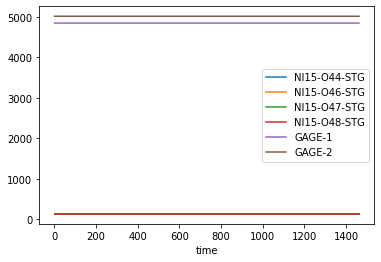

In [35]:
# check the output
csv = os.path.join(tmp_model_ws,'sfr.obs.csv')
option2 = pd.read_csv(csv)

option2.plot(x='time');

<AxesSubplot:>

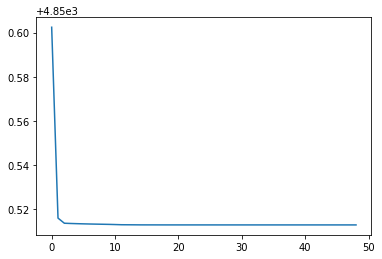

In [36]:
option2['GAGE-1'].plot()

<AxesSubplot:>

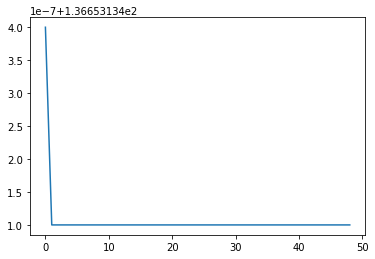

In [37]:
option2['NI15-O44-STG'].plot()

In [38]:
# check the output
csv = os.path.join(tmp_model_ws,'head.obs.csv')
option2 = pd.read_csv(csv)

In [39]:
option2.columns

Index(['time', 'B9-2', 'B10-2', 'B12-1', 'B16-1', 'B2-1', 'B22-1', 'B27',
       'B29', 'KB1-1',
       ...
       'NI1609-3', 'NI1612-2', 'NI1701-1', 'NI1702-1', 'NI1704-2', 'NI1705-2',
       'NI1706-2', 'NI1707-1', 'NI1708-1', 'NI1711-1'],
      dtype='object', length=145)

<AxesSubplot:>

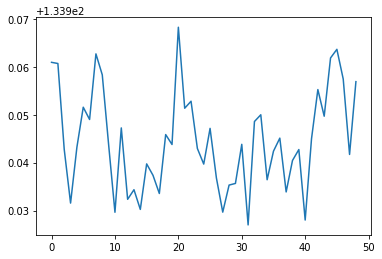

In [40]:
option2['B10-2'].plot()

In [41]:
headfile = '{}.hds'.format(ml_name)
fname = os.path.join(tmp_model_ws, headfile)
hds = flopy.utils.binaryfile.HeadFile(fname)
h = hds.get_data()

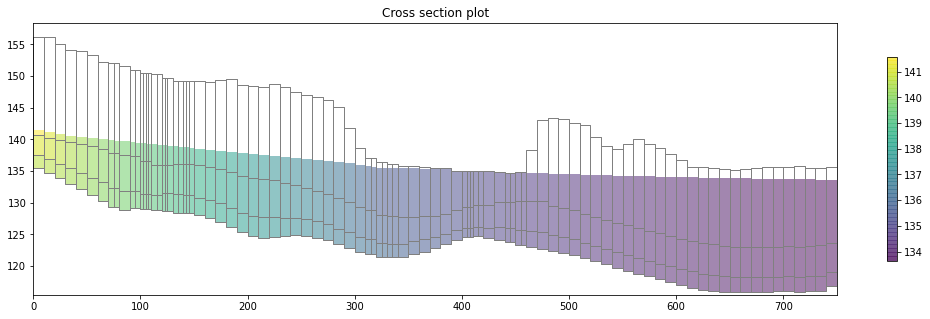

In [42]:
fig = plt.figure(figsize=(18, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_title("Cross section plot")

xsection = np.array([(427000, 6654690), (427540, 6655230)])
xsect = flopy.plot.PlotCrossSection(model=mdl, line={"line": xsection})
patch_collection = xsect.plot_array(h, head=h, alpha=0.5)
line_collection = xsect.plot_grid()
cb = plt.colorbar(patch_collection, shrink=0.75)

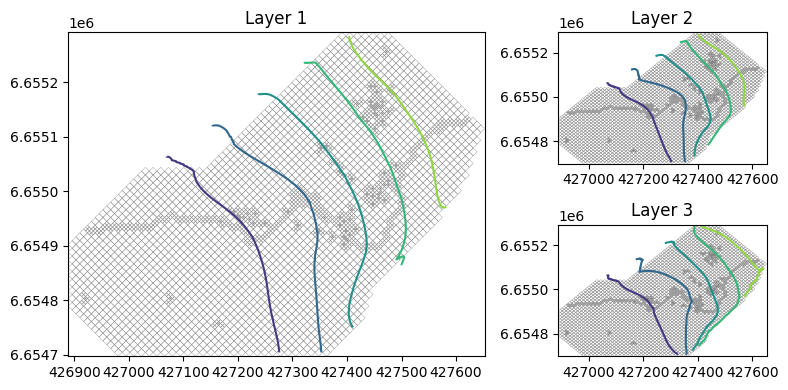

In [43]:
fig = plt.figure(figsize=(8,4), dpi=100)

axs = fig.subplot_mosaic([['Left', 'TopRight'],['Left', 'BottomRight']],
                          gridspec_kw={'width_ratios':[2, 1]})

axs['Left'].set_title('Layer 1')
axs['TopRight'].set_title('Layer 2')
axs['BottomRight'].set_title('Layer 3')

for index, ax in enumerate(axs):
    modelmap = flopy.plot.PlotMapView(model=mdl, ax=axs[ax])
    linecollection = modelmap.plot_grid(lw=0.25)
    contours = modelmap.contour_array(h[index])
    
plt.tight_layout()
plt.show()

In [44]:
sfr_leakage = pd.read_csv(os.path.join(tmp_model_ws, 'sfr_leakage.obs.csv'))
display(sfr_leakage)

,time,LEAK-1,LEAK-2,LEAK-3,LEAK-4,LEAK-5,LEAK-6,LEAK-7,LEAK-8,LEAK-9,...,LEAK-261,LEAK-262,LEAK-263,LEAK-264,LEAK-265,LEAK-266,LEAK-267,LEAK-268,LEAK-269,LEAK-270
0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.879475,-69.768102,-18.413116,-122.679810,-52.563726,-99.486756,-95.260078,-111.429984,-132.805033,-22.920609
1,31.416667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.878306,-69.753567,-18.406900,-122.667666,-52.556709,-99.477757,-95.248788,-111.422446,-132.793371,-22.919426
2,61.833333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.794006,-68.707422,-17.958281,-121.793930,-52.050474,-98.830584,-94.434783,-110.882947,-131.955208,-22.835166
3,92.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.743196,-68.080059,-17.687660,-121.269649,-51.745008,-98.441622,-93.942764,-110.557999,-131.447720,-22.784297
4,122.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.799069,-68.775186,-17.984782,-121.849692,-52.080149,-98.870696,-94.480967,-110.914735,-132.000903,-22.839860
5,153.083333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.837184,-69.246259,-18.187793,-122.243443,-52.309322,-99.162834,-94.850097,-111.158936,-132.381758,-22.878112
6,183.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.824273,-69.084594,-18.119208,-122.108655,-52.231993,-99.063330,-94.726183,-111.076440,-132.254676,-22.865301
7,213.916667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.888989,-69.888203,-18.463576,-122.779807,-52.620580,-99.560354,-95.350885,-111.490689,-132.897798,-22.929984
8,244.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.867033,-69.613395,-18.346938,-122.550643,-52.489062,-99.391169,-95.140129,-111.350390,-132.681639,-22.908195
9,274.750000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.799002,-68.769809,-17.984830,-121.845952,-52.080410,-98.869008,-94.482781,-110.914815,-132.004450,-22.840116


In [45]:
sfr_leakage.describe()

,time,LEAK-1,LEAK-2,LEAK-3,LEAK-4,LEAK-5,LEAK-6,LEAK-7,LEAK-8,LEAK-9,...,LEAK-261,LEAK-262,LEAK-263,LEAK-264,LEAK-265,LEAK-266,LEAK-267,LEAK-268,LEAK-269,LEAK-270
count,49.000000,49.0,49.0,49.0,49.0,49.0,49.0,49.0,49.0,49.0,...,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,731.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.804564,-68.841225,-18.014239,-121.905290,-52.113512,-98.912462,-94.535353,-110.950423,-132.057865,-22.845577
std,434.614326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.048890,0.605886,0.260229,0.506085,0.293665,0.374993,0.472393,0.312729,0.486583,0.048864
min,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.915748,-70.221279,-18.605921,-123.057944,-52.781194,-99.766214,-95.608926,-111.662175,-133.163325,-22.956747
25%,366.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.833666,-69.198377,-18.169456,-122.204169,-52.288829,-99.134774,-94.818468,-111.136973,-132.350803,-22.874917
50%,731.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.799069,-68.775186,-17.984830,-121.849692,-52.080410,-98.870696,-94.482781,-110.914815,-132.004450,-22.840116
75%,1096.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.765370,-68.353986,-17.805757,-121.498556,-51.878311,-98.611448,-94.157475,-110.699884,-131.669200,-22.806512
max,1461.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.721830,-67.814965,-17.574021,-121.048455,-51.616835,-98.277972,-93.736872,-110.422000,-131.236151,-22.763130


ValueError: x and y must have same first dimension, but have shapes (266,) and (270,)

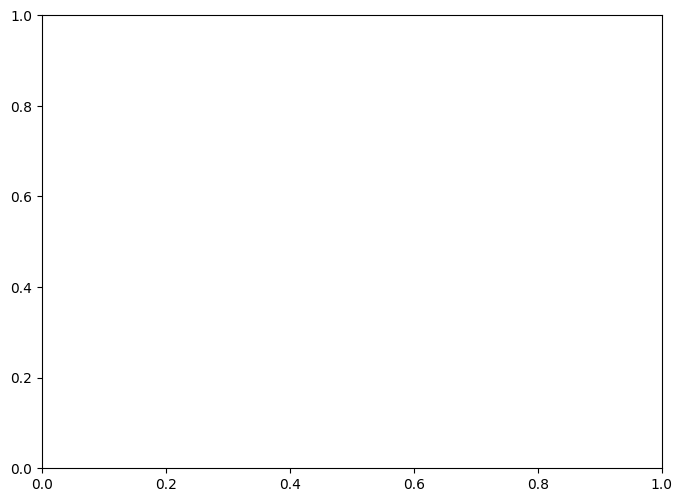

In [46]:
fig = plt.figure(figsize=(8, 6), dpi=100)
for i in range(len(sfr_leakage)):
    x = [i for i in range(266)]
    y = sfr_leakage.iloc[i:i+1, 1:].values[0]
    plt.plot(x, y, alpha=0.1, color='k', linestyle='-.', lw=0.5)
plt.xlabel('Reach no.', fontsize=18)
plt.ylabel('m3/day', fontsize=18)
plt.title('SFR Leakage')
plt.tight_layout()

Delete LR to start over:

In [20]:
shutil.rmtree(lr_ws)